In [2]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
df = pd.read_csv("/Users/tringuyen1803/Desktop/crossroads-classic-analytics-challenge-24/DIWBB_Training.csv")
df.head(10)
len(df)

/var/folders/bm/mmvwf97s6zz3j12mqw_jdsxc0000gn/T/ipykernel_12039/130091772.py:4: DtypeWarning: Columns (13,14,15,16,17,18,19,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/tringuyen1803/Desktop/crossroads-classic-analytics-challenge-24/DIWBB_Training.csv")


209266

In [3]:
df.EventBeginDate.value_counts()

EventBeginDate
3/17/23    3746
3/18/22    3167
3/24/23    2053
3/19/22    1210
4/2/23     1002
3/27/23     991
3/31/23     954
4/3/22      910
4/1/22      903
3/18/23     807
3/25/23     716
3/26/23     621
3/24/22     514
3/25/22     117
3/20/22      83
3/27/22      69
3/28/22      51
3/26/22      38
3/16/23       2
3/20/23       1
Name: count, dtype: int64

In [4]:
df.EventEndDate.value_counts()

EventEndDate
3/20/23    4418
3/27/23    2395
3/21/22    2187
3/20/22    1957
4/2/23     1002
3/31/23     954
4/3/22      910
4/1/22      903
3/25/23     716
3/24/23     649
3/26/23     621
3/27/22     583
3/18/22     316
3/19/23     132
3/25/22     117
3/28/22      51
3/26/22      38
3/18/23       4
3/16/23       2
Name: count, dtype: int64

In [5]:
df['CustomerFirstWBBActionDate'] = pd.to_datetime(df['CustomerFirstWBBActionDate'])
df['CustomerLastWBBActionDate'] = pd.to_datetime(df['CustomerLastWBBActionDate'])
# Compare if it is the same day
#df['is_same_day'] = (df["CustomerFirstWBBActionDate"].dt.date == df['CustomerLastWBBActionDate'].dt.date).astype(int)

# Create a column for years after 2017
len(df['CustomerFirstWBBActionDate'])

df['CustomerFirstWBBPurchaseDate'] = pd.to_datetime(df['CustomerFirstWBBPurchaseDate'])
df['CustomerLastWBBPurchaseDate'] = pd.to_datetime(df['CustomerLastWBBPurchaseDate'])

/var/folders/bm/mmvwf97s6zz3j12mqw_jdsxc0000gn/T/ipykernel_12039/545827497.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['CustomerFirstWBBActionDate'] = pd.to_datetime(df['CustomerFirstWBBActionDate'])
/var/folders/bm/mmvwf97s6zz3j12mqw_jdsxc0000gn/T/ipykernel_12039/545827497.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['CustomerLastWBBActionDate'] = pd.to_datetime(df['CustomerLastWBBActionDate'])
/var/folders/bm/mmvwf97s6zz3j12mqw_jdsxc0000gn/T/ipykernel_12039/545827497.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['CustomerFirstWBBPurchaseDate'

In [6]:
df['CustomerFirstWBBActionDate'] = pd.to_datetime(df['CustomerFirstWBBActionDate'])
df['CustomerLastWBBActionDate'] = pd.to_datetime(df['CustomerLastWBBActionDate'])
# Compare if it is the same day
#df['is_same_day'] = (df["CustomerFirstWBBActionDate"].dt.date == df['CustomerLastWBBActionDate'].dt.date).astype(int)

# Create a column for years after 2017
len(df['CustomerFirstWBBActionDate'])

df['CustomerFirstWBBPurchaseDate'] = pd.to_datetime(df['CustomerFirstWBBPurchaseDate'])
df['CustomerLastWBBPurchaseDate'] = pd.to_datetime(df['CustomerLastWBBPurchaseDate'])
df['CustomerFirstWBBActionYear'] = df['CustomerFirstWBBActionDate'].dt.year
df['CustomerLastWBBActionYear'] = df['CustomerLastWBBActionDate'].dt.year
df['CustomerFirstWBBPurchaseYear'] = df['CustomerFirstWBBPurchaseDate'].dt.year
df['CustomerLastWBBPurchaseYear'] = df['CustomerLastWBBPurchaseDate'].dt.year

In [7]:
df['CustomerFirstWBBActionYear']

0         2013.0
1         2019.0
2         2013.0
3         2013.0
4         2018.0
           ...  
209261    2023.0
209262    2023.0
209263    2022.0
209264    2013.0
209265    2013.0
Name: CustomerFirstWBBActionYear, Length: 209266, dtype: float64

In [39]:
# Drop RecordID, CustomerID, CustomerCity, CustomerState, CustomerZipCode, CustomerInstitutionAffinity
# Categorical : IsCustomerInNCAAMembership, HasCustomerClickedOrOpenedEmailsSixMonthsPrior, EventRoundName, IsEventFinalSite, EventSession, HostingInstitution, FacilityDescription, Facility
# Convert to Time: CustomerFirstWBBActionDate, CustomerFirstWBBPurchaseDate, CustomerLastWBBActionDate, CustomerLastWBBPurchaseDate, Eve

#df['CustomerInstitutionAffinity'] = df['CustomerInstitutionAffinity'].map({'(UNK)': 0}).fillna(1)
columns_to_drop = ['RecordID', 'CustomerID', 'CustomerCity', 'CustomerZipCode', 
                   "CustomerState", "CustomerInstitutionAffinity",
                   "FacilityCity", "FacilityState", 
                   'CustomerFirstWBBActionDate', 'CustomerFirstWBBPurchaseDate', 
                    'CustomerLastWBBActionDate', 'CustomerLastWBBPurchaseDate', "EventBeginDate", "EventEndDate", "FacilityZipCode"]
df1 = df.drop(columns=columns_to_drop)
#Convert Championship year

# datetime_columns = []

# for column in datetime_columns:
#     df1[column] = pd.to_datetime(df1[column])



year_mapping = {2023: 1, 2022: 0}

# Replace the values in the "ChampionshipYear" column
df1['ChampionshipYear'] = df1['ChampionshipYear'].replace(year_mapping)

membership_mapping = {'Yes': 1, 'No': 0, '(UNK)': 2}  # Assign -1 to unknown values for clarity

# Replace the values in the "IsCustomerInNCAAMembership" column
df1['IsCustomerInNCAAMembership'] = df1['IsCustomerInNCAAMembership'].replace(membership_mapping)

categorical_columns = ['HasCustomerClickedOrOpenedEmailsSixMonthsPrior',
                       'EventRoundName', 'IsEventFinalSite', 'EventSession', 
                       'HostingInstitution', "FacilityName",
                       'FacilityDescription', 
                       ]

df_encoded = pd.get_dummies(df1, columns=categorical_columns)
activity_mapping = {
    'No Activity': 0,
    'Primary Purchase': 1,
    'Transfer Recipient': 2,
    'Secondary Purchase': 3,
    'Multiple Activities': 4,
    'Other Secondary Activity': 5
}

# Replace the values in the "Activity" column
df_encoded['ActivityType'] = df_encoded['ActivityType'].replace(activity_mapping)
# Display the DataFrame after one-hot encoding
print(df_encoded)


        ChampionshipYear  IsCustomerInNCAAMembership  ActivityType  \
0                      0                           0             0   
1                      0                           0             0   
2                      0                           0             0   
3                      0                           0             0   
4                      0                           0             0   
...                  ...                         ...           ...   
209261                 1                           0             0   
209262                 1                           0             0   
209263                 1                           0             0   
209264                 1                           0             0   
209265                 1                           0             0   

        CustomerFirstWBBActionYear  CustomerLastWBBActionYear  \
0                           2013.0                     2013.0   
1                           2

In [9]:
!pip install xgboost
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [10]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb

In [11]:
df1.ActivityType.value_counts()

ActivityType
No Activity                 191311
Primary Purchase             13026
Transfer Recipient            3283
Secondary Purchase             879
Multiple Activities            659
Other Secondary Activity       108
Name: count, dtype: int64

In [43]:
X = df_encoded.drop('ActivityType', axis=1)  # Features
y = df_encoded['ActivityType']  # Target variable

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
X.shape

(209266, 84)

In [13]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [14]:
from sklearn.impute import SimpleImputer
import numpy as np
# Create an imputer object
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')  # Replace NaN values with the mean of each column

# Fit the imputer on the data and transform it
X_imputed = imputer.fit_transform(X)

In [15]:
X_imputed

array([[0.000e+00, 0.000e+00, 2.013e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 0.000e+00, 2.019e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 0.000e+00, 2.013e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [1.000e+00, 0.000e+00, 2.022e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 0.000e+00, 2.013e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 0.000e+00, 2.013e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [16]:
from imblearn.over_sampling import SMOTE

# Separate features and target variable

# Apply SMOTE to oversample minority classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_imputed, y)

In [17]:
X_resampled

array([[0.00000000e+00, 0.00000000e+00, 2.01300000e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 2.01900000e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 2.01300000e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.00000000e+00, 0.00000000e+00, 2.01498357e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 9.89444328e-01, 2.01498357e+03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 2.01498357e+03, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [24]:
class_frequencies = {
    0: 0.9136,
    1: 0.0625,
    2: 0.0161,
    3: 0.0042,
    4: 0.0031,
    5: 0.0005
}

# Calculate the total number of samples
total_samples = sum(class_frequencies.values())

# Calculate the class weights
class_weights = {activity: total_samples / (len(class_frequencies) * freq) for activity, freq in class_frequencies.items()}

print("Class Weights:", class_weights)

Class Weights: {0: 0.18242848803269116, 1: 2.6666666666666665, 2: 10.351966873706004, 3: 39.68253968253968, 4: 53.76344086021505, 5: 333.3333333333333}


In [26]:
model = xgb.XGBClassifier(class_weight=class_weights)
model.fit(X_resampled, y_resampled)


/Users/tringuyen1803/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:160: UserWarning: [13:01:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


KeyboardInterrupt: 

In [20]:
y_resampled

0          0
1          0
2          0
3          0
4          0
          ..
1147861    5
1147862    5
1147863    5
1147864    5
1147865    5
Name: ActivityType, Length: 1147866, dtype: int64

In [22]:
y.value_counts()

ActivityType
0    191311
1     13026
2      3283
3       879
4       659
5       108
Name: count, dtype: int64

In [21]:
class_balance = y_resampled.value_counts()
print(class_balance)

ActivityType
0    191311
2    191311
1    191311
4    191311
3    191311
5    191311
Name: count, dtype: int64


In [19]:
y_pred = model.predict(X_test)


NameError: name 'X_test' is not defined

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9824867396186744


In [ ]:
!pip install seaborn

Python(47229) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


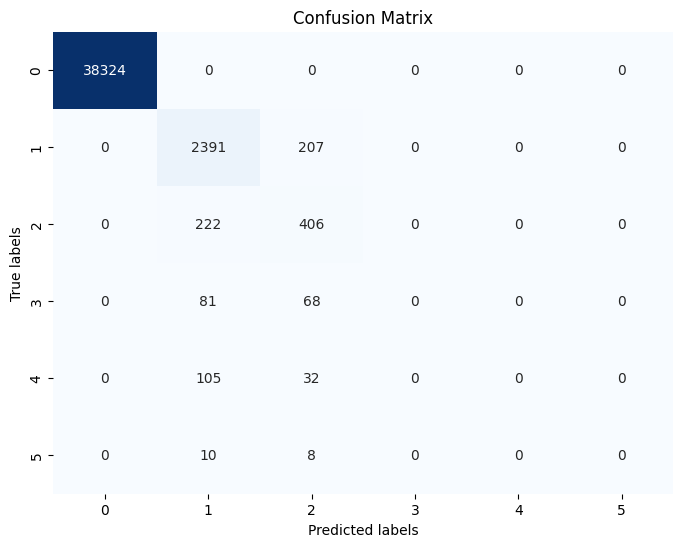

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are your true labels and predicted labels respectively

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [40]:
# Drop RecordID, CustomerID, CustomerCity, CustomerState, CustomerZipCode, CustomerInstitutionAffinity
# Categorical : IsCustomerInNCAAMembership, HasCustomerClickedOrOpenedEmailsSixMonthsPrior, EventRoundName, IsEventFinalSite, EventSession, HostingInstitution, FacilityDescription, Facility
# Convert to Time: CustomerFirstWBBActionDate, CustomerFirstWBBPurchaseDate, CustomerLastWBBActionDate, CustomerLastWBBPurchaseDate, Eve
df_test = pd.read_csv("DIWBB_Test.csv")
#df_test['CustomerInstitutionAffinity'] = df_test['CustomerInstitutionAffinity'].map({'(UNK)': 0}).fillna(1)
df_test['CustomerFirstWBBActionDate'] = pd.to_datetime(df_test['CustomerFirstWBBActionDate'])
df_test['CustomerLastWBBActionDate'] = pd.to_datetime(df_test['CustomerLastWBBActionDate'])
# Compare if it is the same day
# df_test['is_same_day'] = (df_test["CustomerFirstWBBActionDate"].dt.date == df_test['CustomerLastWBBActionDate'].dt.date).astype(int)

# # Create a column for years after 2017
# df_test['is_after_2017'] = (df_test['CustomerLastWBBActionDate'].dt.year > 2017).astype(int)

# df['CustomerFirstWBBActionDate'] = pd.to_datetime(df['CustomerFirstWBBActionDate'])
# df['CustomerLastWBBActionDate'] = pd.to_datetime(df['CustomerLastWBBActionDate'])
# Compare if it is the same day
#df['is_same_day'] = (df["CustomerFirstWBBActionDate"].dt.date == df['CustomerLastWBBActionDate'].dt.date).astype(int)

# Create a column for years after 2017
#len(df['CustomerFirstWBBActionDate'])

df_test['CustomerFirstWBBPurchaseDate'] = pd.to_datetime(df_test['CustomerFirstWBBPurchaseDate'])
df_test['CustomerLastWBBPurchaseDate'] = pd.to_datetime(df_test['CustomerLastWBBPurchaseDate'])
df_test['CustomerFirstWBBActionYear'] = df_test['CustomerFirstWBBActionDate'].dt.year
df_test['CustomerLastWBBActionYear'] = df_test['CustomerLastWBBActionDate'].dt.year

df_test['CustomerFirstWBBPurchaseYear'] = df_test['CustomerFirstWBBPurchaseDate'].dt.year
df_test['CustomerLastWBBPurchaseYear'] = df_test['CustomerLastWBBPurchaseDate'].dt.year


record_id = df_test.RecordID
columns_to_drop = ['RecordID', 'CustomerID', 'CustomerCity', 'CustomerZipCode', "CustomerState",  "FacilityZipCode",
                "FacilityCity", "FacilityState", 'CustomerFirstWBBActionDate', 'CustomerFirstWBBPurchaseDate', 
                    'CustomerLastWBBActionDate', 'CustomerLastWBBPurchaseDate', "EventBeginDate", "EventEndDate", "CustomerInstitutionAffinity" ]
df_test = df_test.drop(columns=columns_to_drop)
#Convert Championship year

# datetime_columns = []

# for column in datetime_columns:
#     df1[column] = pd.to_datetime(df1[column])


year_mapping = {2023: 1, 2022: 0}

# Replace the values in the "ChampionshipYear" column
df_test['ChampionshipYear'] = df_test['ChampionshipYear'].replace(year_mapping)

membership_mapping = {'Yes': 1, 'No': 0, '(UNK)': 2}  # Assign -1 to unknown values for clarity

# Replace the values in the "IsCustomerInNCAAMembership" column
df_test['IsCustomerInNCAAMembership'] = df_test['IsCustomerInNCAAMembership'].replace(membership_mapping)

categorical_columns = ['HasCustomerClickedOrOpenedEmailsSixMonthsPrior',
                       'EventRoundName', 'IsEventFinalSite', 'EventSession', 'HostingInstitution', "FacilityName",
                       'FacilityDescription']

df_test_encoded = pd.get_dummies(df_test, columns=categorical_columns)
activity_mapping = {
    'No Activity': 0,
    'Primary Purchase': 1,
    'Transfer Recipient': 2,
    'Secondary Purchase': 3,
    'Multiple Activities': 4,
    'Other Secondary Activity': 5
}

# Replace the values in the "Activity" column
# df_test_encoded['ActivityType'] = df_test_encoded['ActivityType'].replace(activity_mapping)
# # Display the DataFrame after one-hot encoding
print(df_test_encoded)


       ChampionshipYear  IsCustomerInNCAAMembership  \
0                     0                           0   
1                     0                           0   
2                     0                           0   
3                     0                           0   
4                     0                           0   
...                 ...                         ...   
20930                 1                           0   
20931                 0                           0   
20932                 1                           0   
20933                 1                           0   
20934                 1                           0   

       CustomerFirstWBBActionYear  CustomerLastWBBActionYear  \
0                          2022.0                     2022.0   
1                          2013.0                     2013.0   
2                          2013.0                     2013.0   
3                          2013.0                     2018.0   
4                  

/var/folders/bm/mmvwf97s6zz3j12mqw_jdsxc0000gn/T/ipykernel_12039/3422942786.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_test['CustomerFirstWBBActionDate'] = pd.to_datetime(df_test['CustomerFirstWBBActionDate'])
/var/folders/bm/mmvwf97s6zz3j12mqw_jdsxc0000gn/T/ipykernel_12039/3422942786.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_test['CustomerLastWBBActionDate'] = pd.to_datetime(df_test['CustomerLastWBBActionDate'])
/var/folders/bm/mmvwf97s6zz3j12mqw_jdsxc0000gn/T/ipykernel_12039/3422942786.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_test['

In [ ]:
df.ActivityType.value_counts()

ActivityType
No Activity                 191311
Primary Purchase             13026
Transfer Recipient            3283
Secondary Purchase             879
Multiple Activities            659
Other Secondary Activity       108
Name: count, dtype: int64

In [ ]:
y_pred_test = model.predict(df_test_encoded)

In [ ]:
activity_mapping = {
    0: 'No Activity',
    1: 'Primary Purchase',
    2: 'Transfer Recipient',
    3: 'Secondary Purchase',
    4: 'Multiple Activities',
    5: 'Other Secondary Activity'
}

# Convert numerical predictions to words using the mapping dictionary
y_pred_words = [activity_mapping[pred] for pred in y_pred_test]

# Display the converted predictions
print(y_pred_words)

['No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activ

In [ ]:
import pandas as pd

In [ ]:
submission_df = pd.DataFrame({
    'RecordID': record_id,  # Assuming record_ids contains the RecordIDs
    'ActivityType': y_pred_words # Assuming y_pred contains your predictions
})

# Save the DataFrame to a CSV file
submission_df.to_csv('submission_6.csv', index=False)

In [ ]:
len(y_pred_test)

20935

In [ ]:
%pip install keras

Python(47464) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 16.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.6/240.6 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.5/87.5 kB 8.8 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install tensorflow

Python(47467) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.3/181.3 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.8/208.8 MB 8.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 16.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 15.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 16.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.2/394.2 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 16.0 MB/s eta 0:00:00a 0

In [45]:
from sklearn.ensemble import RandomForestClassifier
model_random_forest = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weights)

# Train the model
model_random_forest.fit(X, y)

# Evaluate the mo

RandomForestClassifier(class_weight={0: 0.18242848803269116,
                                     1: 2.6666666666666665,
                                     2: 10.351966873706004,
                                     3: 39.68253968253968, 4: 53.76344086021505,
                                     5: 333.3333333333333},
                       random_state=42)

In [46]:
y_pred_random_forest = model_random_forest.predict(df_test_encoded)


In [47]:
activity_mapping = {
    0: 'No Activity',
    1: 'Primary Purchase',
    2: 'Transfer Recipient',
    3: 'Secondary Purchase',
    4: 'Multiple Activities',
    5: 'Other Secondary Activity'
}

# Convert numerical predictions to words using the mapping dictionary
y_pred_words_rnn = [activity_mapping[pred] for pred in y_pred_random_forest]

# Display the converted predictions
print(y_pred_words_rnn)

['No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activity', 'No Activ

In [48]:
submission_df = pd.DataFrame({
    'RecordID': record_id,  # Assuming record_ids contains the RecordIDs
    'ActivityType': y_pred_words_rnn # Assuming y_pred contains your predictions
})

# Save the DataFrame to a CSV file
submission_df.to_csv('submission_7.csv', index=False)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

# Assuming X and y contain your features and target variable respectively

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification, adjust for multi-class

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

# Make predictions
y_pred = model.predict(X_test)


/Users/tringuyen1803/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


AttributeError: partially initialized module 'keras.src' has no attribute 'utils' (most likely due to a circular import)